In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

In [ ]:
# df = getDF('reviews_Electronics.json.gz')
df = pd.read_csv('/content/drive/MyDrive/Professional/Break Through AI/BTAI Verizon Project/shortened_data.csv', index_col=[0])

In [ ]:
def sentiment(x):
    if x >= 4:
        return 1
    elif x >= 2:
        return 0
    else:
        return -1

In [ ]:
df['sentiment'] = df['overall'].apply(sentiment)

In [ ]:
df['reviewText'] = df['reviewText'].str.lower()

In [ ]:
df.drop(['unixReviewTime', 'reviewTime'], axis=1, inplace=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

pat = r'\b(?:{})\b'.format('|'.join(stop))
df['processed_text'] = df['reviewText'].str.replace(pat, '')
df['processed_text'] = df['processed_text'].str.replace(r'\s+', ' ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vectorizer = CountVectorizer(min_df=10)

In [ ]:
new_df = df.dropna()

In [ ]:
new_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,sentiment,processed_text
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""","[1, 1]",corey barker does a great job of explaining bl...,5.0,Very thorough,1,corey barker great job explaining blend modes ...
1,A2CX7LUOHB2NDG,0321732944,Bernie,"[0, 0]",while many beginner dvds try to teach you ever...,5.0,Adobe Photoshop CS5 Crash Course with master P...,1,many beginner dvds try teach everything know ...
2,A2NWSAGRHCP8N5,0439886341,bowmans2007,"[1, 1]",it never worked. my daughter worked to earn th...,1.0,absolutely horrible,-1,never worked. daughter worked earn money get ...
3,A2WNBOD3WNDNKT,0439886341,JAL,"[1, 1]",some of the functions did not work properly. ...,3.0,Disappointing,0,functions work properly. daughter bought mone...
4,A1GI0U4ZRJA8WN,0439886341,Truthfull,"[4, 4]",do not waste your money on this thing it is te...,1.0,TERRIBLE DONT WASTE YOUR MONEY,-1,waste money thing terrible boutght product so...
...,...,...,...,...,...,...,...,...,...
510593,A17ZV0K75PQ0UU,B0002V4U3K,Cricket,"[4, 4]","when i opened the box these came in, it looked...",3.0,Just started using these,0,"opened box came , looked 10 gorillas packaged..."
510599,A1398SBAFP050N,B0002V4U3K,"Jerome Burks ""Jerome Burks""","[4, 5]",got the cds but the plastic was broken and the...,3.0,Good not great,0,got cds plastic broken box. bad disc far 50%.
510611,A35HYZ75WLPHHH,B0002V6196,"Cap. Quesadilla ""Queso Co""","[1, 1]",i really thought that i would get a five bar s...,3.0,My expectations were higher,0,really thought would get five bar signal lapt...
510620,AWDZ4HW5PXBQY,B0002V6196,Sam,"[9, 11]",i purchased the cantenna at a black friday sal...,3.0,"Disappointed, but maybe I expected too much",0,purchased cantenna black friday sale. linksys...


In [ ]:
X = vectorizer.fit_transform(new_df['processed_text'])

In [ ]:
positive_reviews = new_df[new_df['sentiment'] == 1]
neutral_reviews = new_df[new_df['sentiment'] == 0]
negative_reviews = new_df[new_df['sentiment'] == -1]

In [ ]:
pos_vectorizer = CountVectorizer(min_df=10)
neut_vectorizer = CountVectorizer(min_df=10)
neg_vectorizer = CountVectorizer(min_df=10)

In [ ]:
pos_feats = pos_vectorizer.fit_transform(positive_reviews['processed_text'])
neut_feats = neut_vectorizer.fit_transform(neutral_reviews['processed_text'])
neg_feats = neg_vectorizer.fit_transform(negative_reviews['processed_text'])

In [ ]:
pos_text = ' '.join(positive_reviews["processed_text"])
neu_text = ' '.join(neutral_reviews["processed_text"])
neg_text = ' '.join(negative_reviews["processed_text"])

In [ ]:
import nltk
nltk.download('punkt')
tokenpos = nltk.word_tokenize(pos_text)
tokenneg = nltk.word_tokenize(neg_text)
tokenneu = nltk.word_tokenize(neu_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')
verbspos = [a[0] for a in nltk.pos_tag(tokenpos) if a[1] == "VB"]
verbsneu = [a[0] for a in nltk.pos_tag(tokenneu) if a[1] == "VB"]
verbsneg = [a[0] for a in nltk.pos_tag(tokenneg) if a[1] == "VB"]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
adjspos = [a[0] for a in nltk.pos_tag(tokenpos) if a[1] == "JJ"]
adjsneu = [a[0] for a in nltk.pos_tag(tokenneu) if a[1] == "JJ"]
adjsneg = [a[0] for a in nltk.pos_tag(tokenneg) if a[1] == "JJ"]

In [ ]:
advspos = [a[0] for a in nltk.pos_tag(tokenpos) if a[1] == "RB"]
advsneu = [a[0] for a in nltk.pos_tag(tokenneu) if a[1] == "RB"]
advsneg = [a[0] for a in nltk.pos_tag(tokenneg) if a[1] == "RB"]

# VERBS

In [ ]:
from collections import Counter

In [ ]:
posverb_counts = Counter(verbspos)
top_posverb = posverb_counts.most_common(10)
neuverb_counts = Counter(verbsneu)
top_neuverb = neuverb_counts.most_common(10)
negverb_counts = Counter(verbsneg)
top_negverb = negverb_counts.most_common(10)

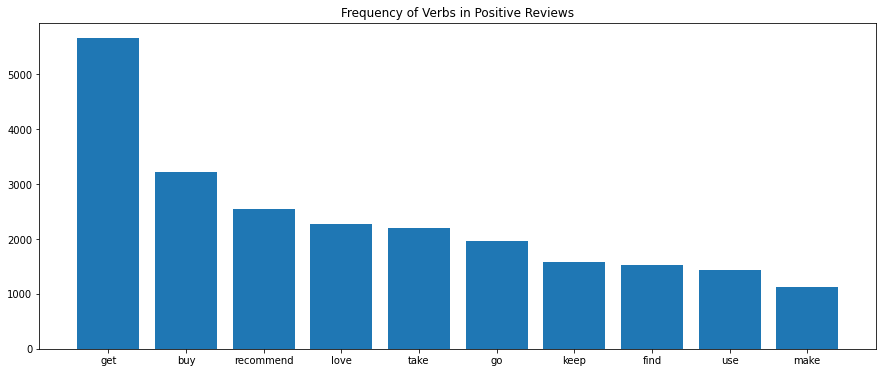

In [ ]:
x_posverb = [pv[0] for pv in top_posverb]
y_posverb = [pv[1] for pv in top_posverb]

plt.figure(figsize=(15, 6))
plt.bar(x_posverb, y_posverb)
plt.title("Frequency of Verbs in Positive Reviews")
plt.show()

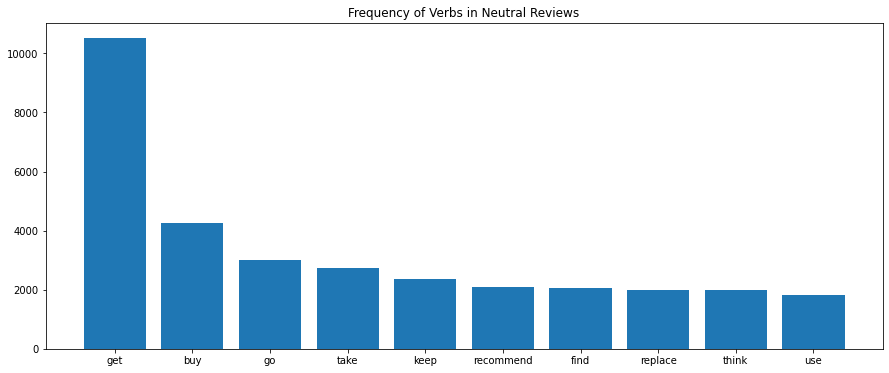

In [ ]:
x_neuverb = [uv[0] for uv in top_neuverb]
y_neuverb = [uv[1] for uv in top_neuverb]

plt.figure(figsize=(15, 6))
plt.bar(x_neuverb, y_neuverb)
plt.title("Frequency of Verbs in Neutral Reviews")
plt.show()

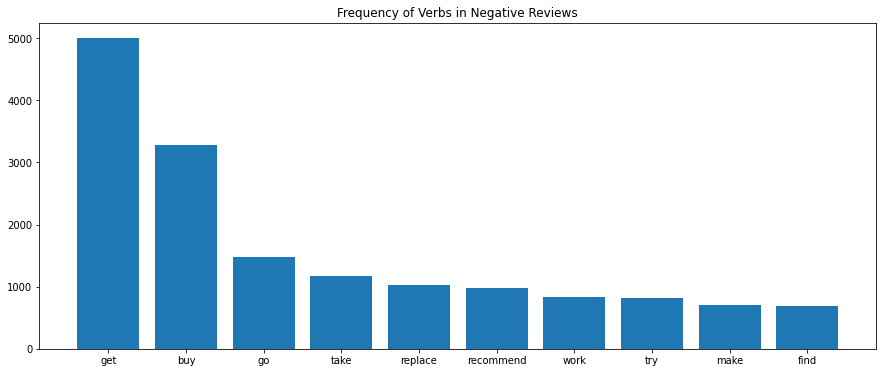

In [ ]:
x_negverb = [nv[0] for nv in top_negverb]
y_negverb = [nv[1] for nv in top_negverb]

plt.figure(figsize=(15, 6))
plt.bar(x_negverb, y_negverb)
plt.title("Frequency of Verbs in Negative Reviews")
plt.show()

#ADVERBS

In [ ]:
posadv_counts = Counter(advspos)
top_posadv = posadv_counts.most_common(10)
neuadv_counts = Counter(advsneu)
top_neuadv = neuadv_counts.most_common(10)
negadv_counts = Counter(advsneg)
top_negadv = negadv_counts.most_common(10)

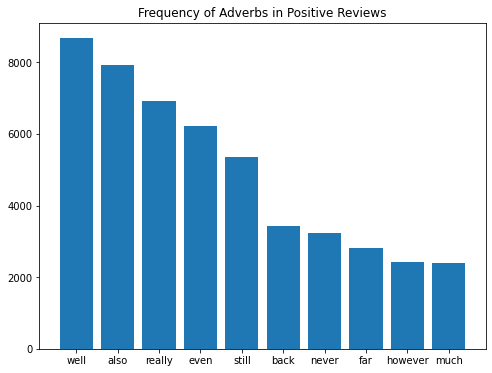

In [ ]:
x_posadv = [pa[0] for pa in top_posadv]
y_posadv = [pa[1] for pa in top_posadv]

plt.figure(figsize=(8, 6))
plt.bar(x_posadv, y_posadv)
plt.title("Frequency of Adverbs in Positive Reviews")
plt.show()

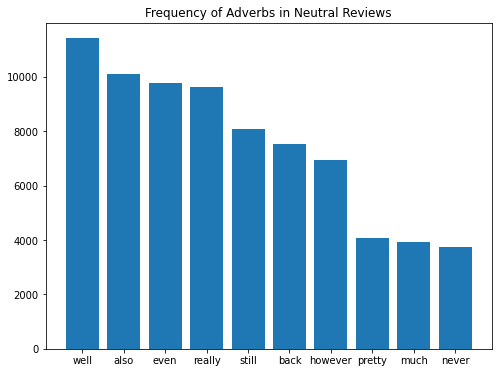

In [ ]:
x_neuadv = [ua[0] for ua in top_neuadv]
y_neuadv = [ua[1] for ua in top_neuadv]

plt.figure(figsize=(8, 6))
plt.bar(x_neuadv, y_neuadv)
plt.title("Frequency of Adverbs in Neutral Reviews")
plt.show()

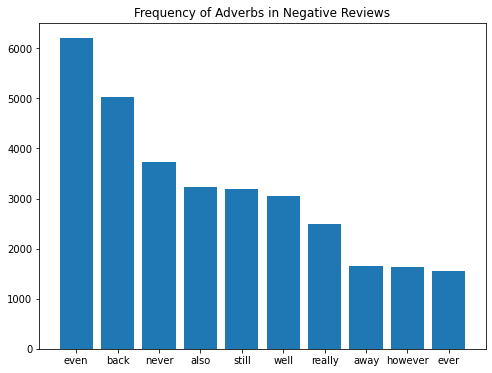

In [ ]:
x_negadv = [na[0] for na in top_negadv]
y_negadv = [na[1] for na in top_negadv]

plt.figure(figsize=(8, 6))
plt.bar(x_negadv, y_negadv)
plt.title("Frequency of Adverbs in Negative Reviews")
plt.show()

# ADJECTIVES


In [ ]:
posadj_counts = Counter(adjspos)
top_posadj = posadj_counts.most_common(10)
neuadj_counts = Counter(adjsneu)
top_neuadj = neuadj_counts.most_common(10)
negadj_counts = Counter(adjsneg)
top_negadj = negadj_counts.most_common(10)

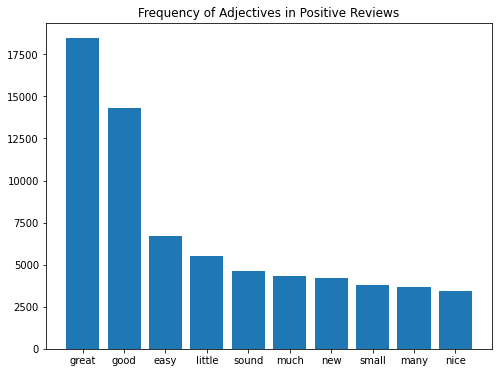

In [ ]:
x_posadj = [pj[0] for pj in top_posadj]
y_posadj = [pj[1] for pj in top_posadj]

plt.figure(figsize=(8, 6))
plt.bar(x_posadj, y_posadj)
plt.title("Frequency of Adjectives in Positive Reviews")
plt.show()

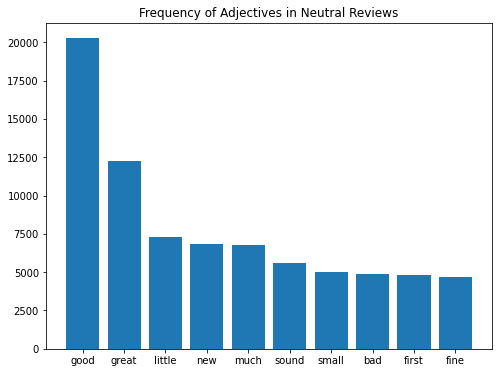

In [ ]:
x_neuadj = [uj[0] for uj in top_neuadj]
y_neuadj = [uj[1] for uj in top_neuadj]

plt.figure(figsize=(8, 6))
plt.bar(x_neuadj, y_neuadj)
plt.title("Frequency of Adjectives in Neutral Reviews")
plt.show()

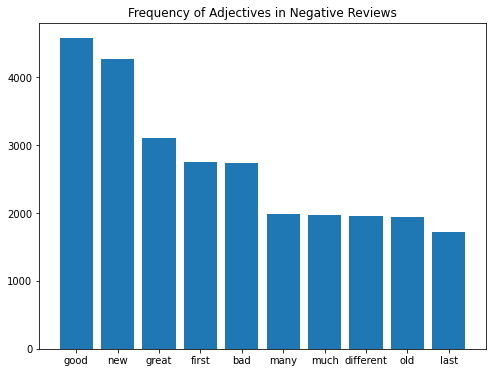

In [ ]:
x_negadj = [nj[0] for nj in top_negadj]
y_negadj = [nj[1] for nj in top_negadj]

plt.figure(figsize=(8, 6))
plt.bar(x_negadj, y_negadj)
plt.title("Frequency of Adjectives in Negative Reviews")
plt.show()